In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [17]:
meas_columns = session.execute('select * from Measurement').keys()
meas_columns

['id', 'station', 'date', 'prcp', 'tobs']

In [18]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe799975550>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [22]:
for row in session.query(Measurement.date).all():
    print(row)

('2015-10-11',)
('2015-10-12',)
('2015-10-13',)
('2015-10-14',)
('2015-10-15',)
('2015-10-16',)
('2015-10-18',)
('2015-10-19',)
('2015-10-20',)
('2015-10-21',)
('2015-10-22',)
('2015-10-23',)
('2015-10-24',)
('2015-10-25',)
('2015-10-26',)
('2015-10-27',)
('2015-10-28',)
('2015-10-29',)
('2015-10-30',)
('2015-10-31',)
('2015-11-01',)
('2015-11-02',)
('2015-11-03',)
('2015-11-04',)
('2015-11-05',)
('2015-11-06',)
('2015-11-08',)
('2015-11-09',)
('2015-11-10',)
('2015-11-11',)
('2015-11-12',)
('2015-11-13',)
('2015-11-14',)
('2015-11-15',)
('2015-11-16',)
('2015-11-17',)
('2015-11-18',)
('2015-11-19',)
('2015-11-20',)
('2015-11-21',)
('2015-11-22',)
('2015-11-23',)
('2015-11-24',)
('2015-11-25',)
('2015-11-26',)
('2015-11-27',)
('2015-11-28',)
('2015-11-30',)
('2015-12-01',)
('2015-12-02',)
('2015-12-03',)
('2015-12-04',)
('2015-12-07',)
('2015-12-08',)
('2015-12-09',)
('2015-12-10',)
('2015-12-11',)
('2015-12-12',)
('2015-12-13',)
('2015-12-14',)
('2015-12-15',)
('2015-12-16',)
('2015-1

In [31]:
may_dates = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06")
    #group_by(Dow.stock).\
    #order_by(Dow.stock).all()
may_dateas

NameError: name 'sel' is not defined

In [ ]:
session.query(Event).filter(extract('month', Event.date)==7).all()

In [28]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [30]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

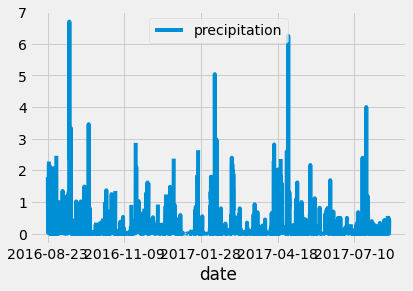

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df.to_string(index=False))


# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [43]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

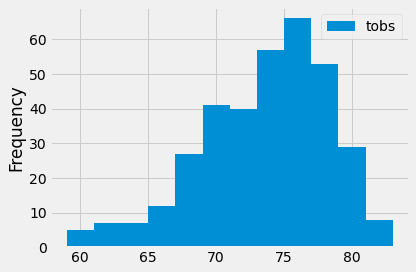

In [75]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)

df = pd.DataFrame(results, columns=['tobs'])
#print(df)

df.plot.hist(bins=12)
plt.tight_layout()

In [61]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [69]:
meas_columns = session.execute('select * from station').keys()
meas_columns

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

# Challenge